*** Pranjal Singh ***

*** IIMK | IPL Dataset | Capstone Project | ***

In [4]:
import pandas as pd ## used for reading and exploring the data
import numpy as np ## used for mathematical calculations
import matplotlib.pyplot as plt
import seaborn as sn ## For creating Graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1.5px  BLUE solid !important;
  color: black !important;
}

Question 1: Mitra decides to form homogeneous subgroups of players, which would better help him to express the nuances of T20 cricket. How would you go about implementing this? Apply relevant data analysis technique and generate useful insights.


In [6]:
ipldata = pd.read_excel("IPL.xlsx",sheet_name="Sheet1")

# Preparing the Data

In [14]:
ipldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    70 non-null     object 
 1   Team      70 non-null     object 
 2   Runs      70 non-null     int64  
 3   Avg       70 non-null     float64
 4   SR        70 non-null     float64
 5   Hundreds  70 non-null     int64  
 6   Fifties   70 non-null     int64  
 7   Fours     70 non-null     int64  
 8   Sixes     70 non-null     int64  
 9   Salary    70 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 5.6+ KB


In [8]:
ipldata.shape

(70, 10)

In [7]:
## Step 1: Deleting 1st and 2nd column as it's not needed for analysis
ipldata = ipldata.drop(columns=['Unnamed: 0','Unnamed: 1'])

In [10]:
ipldata.head(10)

,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.72
1,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62
2,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51
3,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34
4,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.33
5,Axar Patel,Royal Challengers Bangalore,110,18.33,125.00,0,0,10,3,0.71
6,Ben Stokes,Rajasthan Royals,123,20.50,124.24,0,0,8,4,1.95
7,Bhuvneshwar Kumar,Sunrisers Hyderabad,12,4.00,63.15,0,0,1,0,1.33
8,Chris Gayle,Kings XI Punjab,490,40.83,153.60,0,4,45,34,0.31
9,Chris Lynn,Kolkata Knight Riders,405,31.15,139.65,0,4,41,22,1.50


In [11]:
ipldata.isnull().sum() ## Step 2: Checking for null values

Player      0
Team        0
Runs        0
Avg         0
SR          0
Hundreds    0
Fifties     0
Fours       0
Sixes       0
Salary      0
dtype: int64

In [12]:
ipldata.isna().sum() ## Step 3: Checking for NA values

Player      0
Team        0
Runs        0
Avg         0
SR          0
Hundreds    0
Fifties     0
Fours       0
Sixes       0
Salary      0
dtype: int64

# Exploring the Data

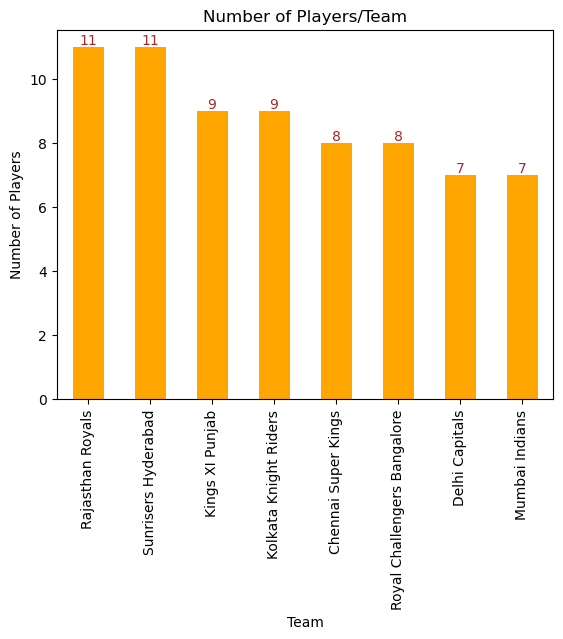

In [13]:
ax=ipldata.groupby('Team')['Player'].count().sort_values(ascending = False).plot(kind ='bar',title='Number of Players/Team',color='orange')
plt.ylabel('Number of Players')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',color='brown')

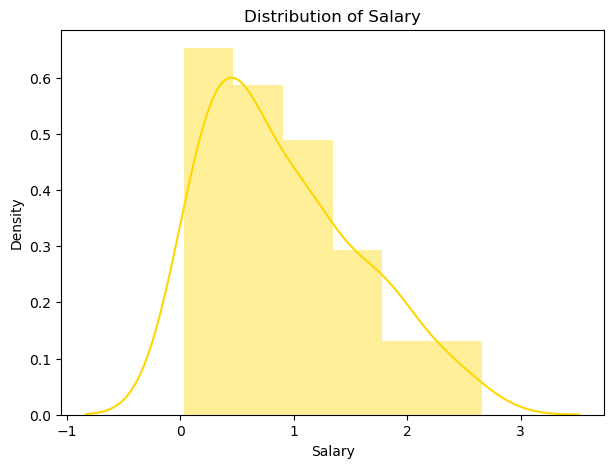

In [15]:
f, ax = plt.subplots(figsize=(7,5))
sn.distplot(ipldata['Salary '], color="gold")
ax.set(xlabel="Salary")
ax.set(title="Distribution of Salary")
plt.show()

Salary is slightly right skewed with majority of the players earning less salary

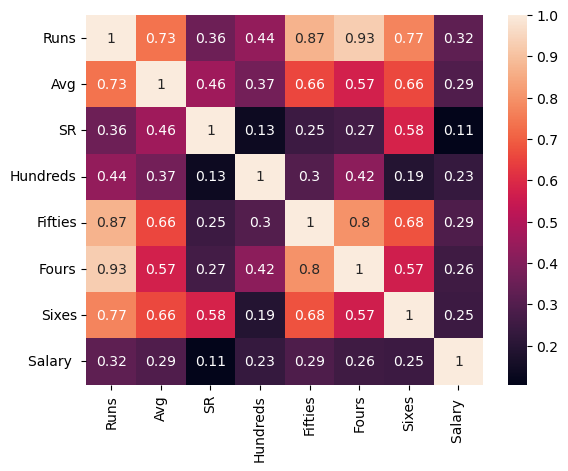

In [68]:
sn.heatmap(ipldata[['Runs', 'Avg', 'SR', 'Hundreds', 'Fifties', 'Fours', 'Sixes', 'Salary ']].corr(), annot=True);

High Correlation between Runs, Fifties, Fours, Sizes and Avg

Average Correlation between SR and Sixes

Average Correlation between Salary and Runs

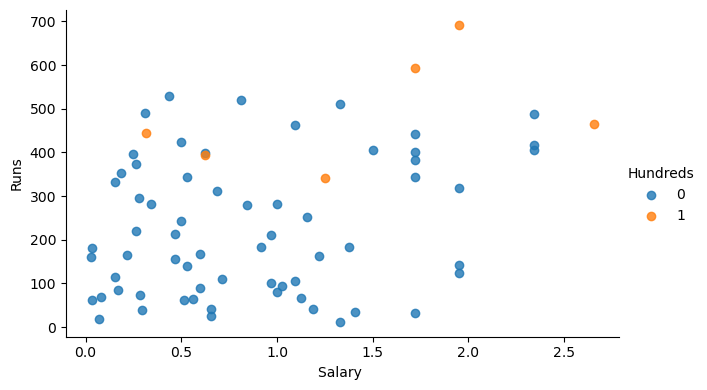

In [67]:
sn.lmplot(x='Salary ', y='Runs', data=ipldata, fit_reg=False, height=4, aspect=1.6, hue='Hundreds')

# Analysing the Data

In [17]:
# Step 4: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ipldata_df = scaler.fit_transform(ipldata.iloc[:,2:])

Text(0, 0.5, 'Total Within Sum of Square')

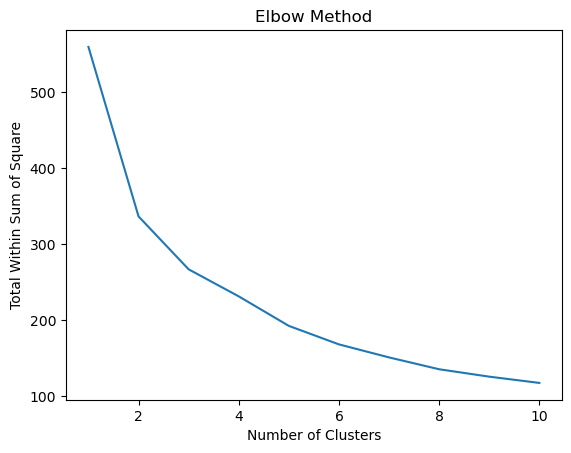

In [18]:
# Step 5. Determine optimal number of clusters using elbow method
from sklearn.cluster import KMeans

cluster_range = range(1, 11) 
twss = []
for i in cluster_range:
    clusters = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    clusters.fit(scaled_ipldata_df)
    twss.append(clusters.inertia_)
plt.plot(cluster_range, twss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Within Sum of Square')

Based on Elbow method we are selecting 3 Clusters

In [24]:
# Step 6: Fit k-means clustering model to the data with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
Cluster3 = kmeans.fit_predict(scaled_ipldata_df)

In [25]:
# Step 7: Add cluster labels to the original DataFrame
ipldata['Cluster'] = Cluster3

In [26]:
ipldata.head(10)

,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,Cluster
0,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.72,2
1,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62,0
2,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51,1
3,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34,1
4,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.33,2
5,Axar Patel,Royal Challengers Bangalore,110,18.33,125.00,0,0,10,3,0.71,1
6,Ben Stokes,Rajasthan Royals,123,20.50,124.24,0,0,8,4,1.95,1
7,Bhuvneshwar Kumar,Sunrisers Hyderabad,12,4.00,63.15,0,0,1,0,1.33,1
8,Chris Gayle,Kings XI Punjab,490,40.83,153.60,0,4,45,34,0.31,2
9,Chris Lynn,Kolkata Knight Riders,405,31.15,139.65,0,4,41,22,1.50,2


In [27]:
## Step 8: Changing Cluster Numbers to Names
ipldata.loc[ipldata['Cluster'] == 0, "Cluster"] = "High Performers"
ipldata.loc[ipldata['Cluster'] == 1, "Cluster"] = "Low Performers"
ipldata.loc[ipldata['Cluster'] == 2, "Cluster"] = "Average Performers"

In [69]:
ipldata.head(10)

,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,Cluster
0,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.72,Average Performers
1,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62,High Performers
2,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51,Low Performers
3,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34,Low Performers
4,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.33,Average Performers
5,Axar Patel,Royal Challengers Bangalore,110,18.33,125.00,0,0,10,3,0.71,Low Performers
6,Ben Stokes,Rajasthan Royals,123,20.50,124.24,0,0,8,4,1.95,Low Performers
7,Bhuvneshwar Kumar,Sunrisers Hyderabad,12,4.00,63.15,0,0,1,0,1.33,Low Performers
8,Chris Gayle,Kings XI Punjab,490,40.83,153.60,0,4,45,34,0.31,Average Performers
9,Chris Lynn,Kolkata Knight Riders,405,31.15,139.65,0,4,41,22,1.50,Average Performers


In [28]:
## Step 9: checking Mean and Standard deviation of all features for each cluster
ipldata.groupby('Cluster').agg(['mean', 'std']).round(1)

Runs          Avg           SR       Hundreds       \
                     mean    std  mean   std   mean   std     mean  std   
Cluster                                                                   
Average Performers 388.30  82.60 36.20 12.30 142.80 21.10     0.00 0.00   
High Performers    488.20 130.70 46.50 15.30 144.10  7.90     1.00 0.00   
Low Performers     116.40  72.20 20.50 10.90 124.70 26.80     0.00 0.00   

                   Fifties      Fours       Sixes       Salary        
                      mean  std  mean   std  mean   std    mean  std  
Cluster                                                               
Average Performers    2.90 1.00 35.60 11.90 18.00 10.30    1.00 0.70  
High Performers       3.20 3.10 45.50  9.60 16.50  5.90    1.40 0.90  
Low Performers        0.30 0.40  9.70  6.90  4.40  3.30    0.70 0.50

<Axes: xlabel='Cluster'>

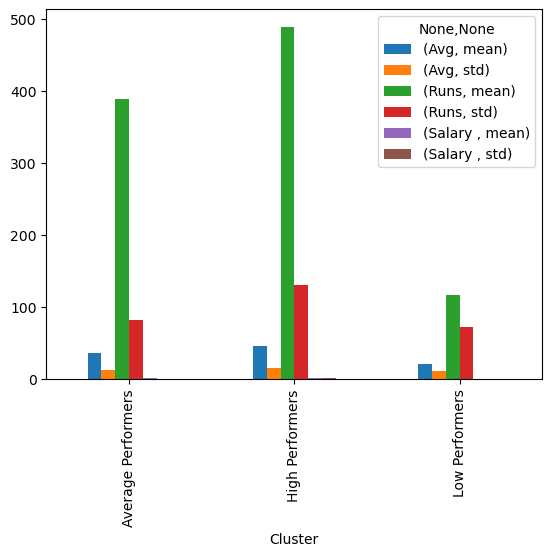

In [29]:
ipldata.groupby('Cluster').agg({'Avg': ['mean', 'std'],
                                      'Runs': ['mean', 'std'],
                                      'Salary ': ['mean', 'std']}).round(1).plot.bar()

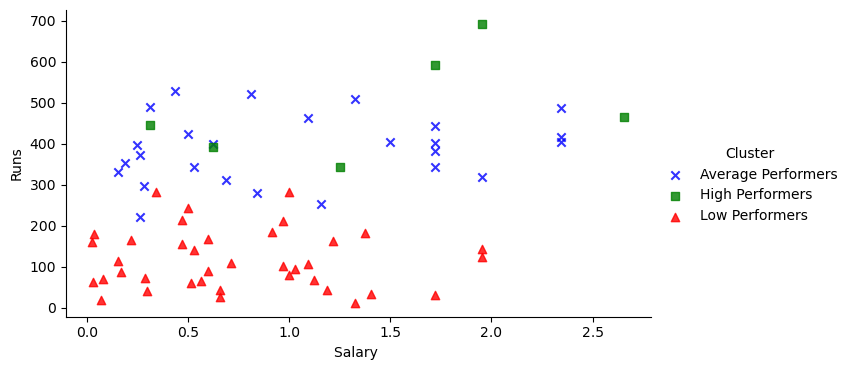

In [75]:
## Step 10: Creating Scatter plot between Runs and Salary Cluster Wise
sn.lmplot(x='Salary ', y='Runs', data=ipldata, fit_reg=False, height=3.8, aspect=1.8, 
          hue='Cluster', markers=["x", "s", "^"], palette=["blue", "green", "red"])

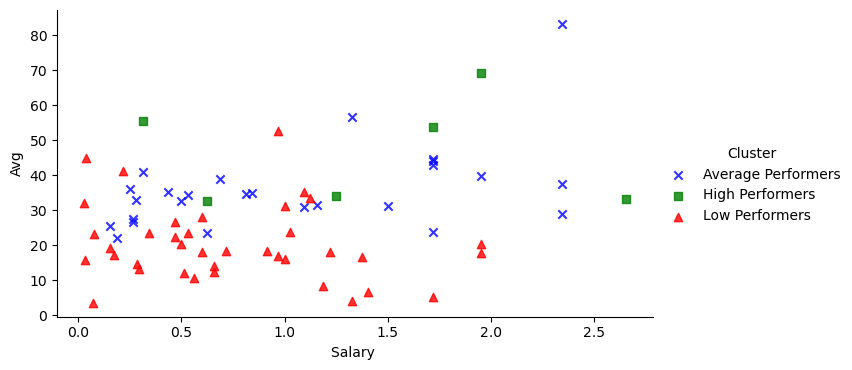

In [77]:
sn.lmplot(x='Salary ', y='Avg', data=ipldata, fit_reg=False, height=3.8, aspect=1.8, 
          hue='Cluster', markers=["x", "s", "^"], palette=["blue", "green", "red"])

In [76]:
ipldata.to_csv("iplcluster.csv")